In [ ]:
!pip install -q lucid>=0.2.3

In [ ]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,800
create_opengl_context((WIDTH, HEIGHT))

# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR))
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
def addVertex(a,b):
    gl.glVertex2f( a/(WIDTH/2), b/(HEIGHT/2) )

#####################################################

def zone_checkmod(x0,y0,x1,y1):
    dx = x1 - x0
    dy = y1 - y0

    if abs(dx) > abs(dy):
        if dx >= 0 and dy >= 0:
            zone = 0
        elif dx <= 0 and dy >= 0:
            zone = 3
        elif dx >= 0 and dy <= 0:
            zone = 7
        elif dx <= 0 and dy <= 0:
            zone = 4

    else:
        if dx >= 0 and dy >= 0:
            zone = 1
        elif dx <= 0 and dy >= 0:
            zone = 2
        elif dx >= 0 and dy <= 0:
            zone = 6
        elif dx <= 0 and dy <= 0:
            zone = 5

    return zone

##########################################

def scal(x,y,s):
  sc = np.array([[s,0,0],
             [0,s,0],
             [0,0,1]])

  m = np.array([[x],
              [y],
              [1]])

  scm = np.matmul(sc,m)

  l = [scm[0][0],scm[1][0]]

  return l

In [ ]:
def midpoint_algo(x0,y0,x1,y1,zone):
    dx = x1 - x0
    dy = y1 - y0

    dold = (2*dy) - dx
    de = 2*dy
    dne = 2*(dy - dx)

    x = x0
    y = y0

    while x <= x1:
        #print(x,y)
        zone0tomain(x, y, zone)

        if dold < 0:
            x = x + 1
            dold = dold + de

        else:
            x = x + 1
            y = y + 1
            dold = dold + dne

        #draw_pixel(x,y)
#midpoint_algo(5, 2, 9, 5)

def zone_check(x0,y0,x1,y1):
    dx = x1 - x0
    dy = y1 - y0

    if abs(dx) > abs(dy):
        if dx >= 0 and dy >= 0:
            zone = 0
        elif dx <= 0 and dy >= 0:
            zone = 3
        elif dx >= 0 and dy <= 0:
            zone = 7
        elif dx <= 0 and dy <= 0:
            zone = 4

    else:
        if dx >= 0 and dy >= 0:
            zone = 1
        elif dx <= 0 and dy >= 0:
            zone = 2
        elif dx >= 0 and dy <= 0:
            zone = 6
        elif dx <= 0 and dy <= 0:
            zone = 5

    #print(zone)
    if zone == 0:
        midpoint_algo(x0, y0, x1, y1, zone)
    else:
        converttozone0(x0, y0, x1, y1, zone)

def converttozone0(x0,y0,x1,y1,zone):
    if zone == 0:
        X0 = x0
        Y0 = y0
        X1 = x1
        Y1 = y1

    if zone == 1:
        X0 = y0
        Y0 = x0
        X1 = y1
        Y1 = x1

    if zone == 2:
        X0 = y0
        Y0 = -x0
        X1 = y1
        Y1 = -x1

    if zone == 3:
        X0 = -x0
        Y0 = y0
        X1 = -x1
        Y1 = y1

    if zone == 4:
        X0 = -x0
        Y0 = -y0
        X1 = -x1
        Y1 = -y1

    if zone == 5:
        X0 = -y0
        Y0 = -x0
        X1 = -y1
        Y1 = -x1

    if zone == 6:
        X0 = -y0
        Y0 = x0
        X1 = -y1
        Y1 = x1

    if zone == 7:
        X0 = x0
        Y0 = -y0
        X1 = x1
        Y1 = -y1

    midpoint_algo(X0, Y0, X1, Y1, zone)

def zone0tomain(x0,y0, zone):
    if zone == 0:
        X0 = x0
        Y0 = y0

    if zone == 1:
        X0 = y0
        Y0 = x0

    if zone == 2:
        X0 = -y0
        Y0 = x0

    if zone == 3:
        X0 = -x0
        Y0 = y0

    if zone == 4:
        X0 = -x0
        Y0 = -y0

    if zone == 5:
        X0 = -y0
        Y0 = -x0

    if zone == 6:
        X0 = y0
        Y0 = -x0

    if zone == 7:
        X0 = x0
        Y0 = -y0

    #gl.glColor3f(0/255,255/255,0/255)
    #gl.glPointSize(1)

    gl.glBegin(gl.GL_POINTS)
    addVertex(X0,Y0)
    gl.glEnd()

In [ ]:
info = {}
def midpoint_algov2(x0,y0,x1,y1,zone , pzone):
    dx = x1 - x0
    dy = y1 - y0

    dold = (2*dy) - dx
    de = 2*dy
    dne = 2*(dy - dx)

    x = x0
    y = y0

    while x <= x1:
        #print(x,y)
        zone0tomainv2(x, y, zone, pzone)

        if dold < 0:
            x = x + 1
            dold = dold + de

        else:
            x = x + 1
            y = y + 1
            dold = dold + dne

        #draw_pixel(x,y)
#midpoint_algo(5, 2, 9, 5)

def zone_checkv2(x0,y0,x1,y1, pzone):
    dx = x1 - x0
    dy = y1 - y0

    if abs(dx) > abs(dy):
        if dx >= 0 and dy >= 0:
            zone = 0
        elif dx <= 0 and dy >= 0:
            zone = 3
        elif dx >= 0 and dy <= 0:
            zone = 7
        elif dx <= 0 and dy <= 0:
            zone = 4

    else:
        if dx >= 0 and dy >= 0:
            zone = 1
        elif dx <= 0 and dy >= 0:
            zone = 2
        elif dx >= 0 and dy <= 0:
            zone = 6
        elif dx <= 0 and dy <= 0:
            zone = 5

    #print(zone)
    if zone == 0:
        midpoint_algov2(x0, y0, x1, y1, zone , pzone)
    else:
        converttozone0v2(x0, y0, x1, y1, zone, pzone)

def converttozone0v2(x0,y0,x1,y1,zone, pzone):
    if zone == 0:
        X0 = x0
        Y0 = y0
        X1 = x1
        Y1 = y1

    if zone == 1:
        X0 = y0
        Y0 = x0
        X1 = y1
        Y1 = x1

    if zone == 2:
        X0 = y0
        Y0 = -x0
        X1 = y1
        Y1 = -x1

    if zone == 3:
        X0 = -x0
        Y0 = y0
        X1 = -x1
        Y1 = y1

    if zone == 4:
        X0 = -x0
        Y0 = -y0
        X1 = -x1
        Y1 = -y1

    if zone == 5:
        X0 = -y0
        Y0 = -x0
        X1 = -y1
        Y1 = -x1

    if zone == 6:
        X0 = -y0
        Y0 = x0
        X1 = -y1
        Y1 = x1

    if zone == 7:
        X0 = x0
        Y0 = -y0
        X1 = x1
        Y1 = -y1

    midpoint_algov2(X0, Y0, X1, Y1, zone , pzone)

def zone0tomainv2(x0,y0, zone , pzone):
    global info
    if zone == 0:
        X0 = x0
        Y0 = y0

    if zone == 1:
        X0 = y0
        Y0 = x0

    if zone == 2:
        X0 = -y0
        Y0 = x0

    if zone == 3:
        X0 = -x0
        Y0 = y0

    if zone == 4:
        X0 = -x0
        Y0 = -y0

    if zone == 5:
        X0 = -y0
        Y0 = -x0

    if zone == 6:
        X0 = y0
        Y0 = -x0

    if zone == 7:
        X0 = x0
        Y0 = -y0

    if pzone == 0 or pzone == 1:
      eqn = ((X0 - 280)**2 + (Y0 - 280)**2 - 400)
      if eqn <= 0:
        #print(X0,Y0)
        #print('The piece is in the Pocket')
        info[X0,Y0] = 'YES'

      else:
        #print('The piece is NOT in the Pocket')
        info[X0,Y0] = 'NO'

    if pzone == 2 or pzone == 3:
      eqn = ((X0 + 280)**2 + (Y0 - 280)**2 - 400)
      if eqn <= 0:
        #print(X0,Y0)
        #print('The piece is in the Pocket')
        info[X0,Y0] = 'YES'

      else:
        #print('The piece is NOT in the Pocket')
        info[X0,Y0] = 'NO'

    if pzone == 4 or pzone == 5:
      eqn = ((X0 + 280)**2 + (Y0 + 280)**2 - 400)
      if eqn <= 0:
        #print(X0,Y0)
        #print('The piece is in the Pocket')
        info[X0,Y0] = 'YES'

      else:
        #print('The piece is NOT in the Pocket')
        info[X0,Y0] = 'NO'

    if pzone == 6 or pzone == 7:
      eqn = ((X0 - 280)**2 + (Y0 + 280)**2 - 400)
      if eqn <= 0:
        #print(X0,Y0)
        #print('The piece is in the Pocket')
        info[X0,Y0] = 'YES'

      else:
        #print('The piece is NOT in the Pocket')
        info[X0,Y0] = 'NO'


    #print(X0, Y0)
    #gl.glColor3f(0/255,255/255,0/255)
    #gl.glPointSize(1)

    #gl.glBegin(gl.GL_POINTS)
    #addVertex(X0,Y0)
    #gl.glEnd()

In [ ]:
#rafi's version
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

def circle_algo_r(r,cx=0,cy=0):
  x = 0
  y = r
  d = 1 - r
  while x <= y:
    if d < 0:
        d = d + (2*x) + 3
        x += 1
    else:
        d = d + (2*x) - (2*y) + 5
        x += 1
        y -= 1
    #print(cx + x,cy + y)
    # gl.glColor3f(69/255,7/255,13/255)
    # gl.glPointSize(2)

    # gl.glColor3f(69/255,7/255,13/255)
    # gl.glPointSize(2)

    gl.glBegin(gl.GL_POINTS)
    addVertex(cx + x,cy + y)
    addVertex(cx + y,cy + x)
    addVertex(cx + y,cy - x)
    addVertex(cx + x,cy - y)
    addVertex(cx - y,cy - x)
    addVertex(cx - y,cy + x)
    addVertex(cx - x,cy + y)
    addVertex(cx - x,cy - y)
    gl.glEnd()

#Background Border
gl.glColor3f(135/255,100/255,10/255)
gl.glPointSize(1)

gl.glBegin(gl.GL_QUADS)
addVertex(330,330)
addVertex(-330,330)
addVertex(-330,-330)
addVertex(330,-330)
gl.glEnd()

#backrgound white
gl.glColor3f(247/255,247/255,247/255)
gl.glPointSize(1)

gl.glBegin(gl.GL_QUADS)
addVertex(300,300)
addVertex(-300,300)
addVertex(-300,-300)
addVertex(300,-300)
gl.glEnd()


#for the 45 degree line
gl.glColor3f(0/255,0/255,0/255)
gl.glPointSize(2)

zone_check(100,100,200,200)
zone_check(100,-100,200,-200)
zone_check(-100,100,-200,200)
zone_check(-100,-100,-200,-200)

gl.glColor3f(0/255,0/255,0/255)
gl.glPointSize(2)
#The upper line
circle_algo_r(10,160,210)
circle_algo_r(10,-160,210)
zone_check(160,220,-160,220)
zone_check(160,200,-160,200)

#The lower line
circle_algo_r(10,-160,-210)
circle_algo_r(10,160,-210)
zone_check(160,-220,-160,-220)
zone_check(160,-200,-160,-200)
zone_check(170,-210,-170,-210)#striker line/limit


#The right line
circle_algo_r(10,200,-150)
circle_algo_r(10,200,150)
zone_check(190,150,190,-150)
zone_check(210,150,210,-150)

#The left line
circle_algo_r(10,-200,-150)
circle_algo_r(10,-200,150)
zone_check(-190,150,-190,-150)
zone_check(-210,150,-210,-150)

#The circle of center
gl.glColor3f(251/255,4/255,23/255)
gl.glPointSize(5)
circle_algo_r(10,0,0)
circle_algo_r(5,0,0)
circle_algo_r(3,0,0)
gl.glColor3f(0/255,0/255,0/255)
gl.glPointSize(2)
circle_algo_r(70,0,0)
circle_algo_r(18,0,0)

#pocket (made transform)
# gl.glColor3f(0/255,0/255,0/255)
# gl.glPointSize(3)
# circle_algo_r(20,280,280)
# circle_algo_r(20,-280,280)
# circle_algo_r(20,-280,-280)
# circle_algo_r(20,280,-280)


#Maroon Triangles
gl.glColor3f(85/255,25/255,25/255)
gl.glPointSize(4)
gl.glBegin(gl.GL_TRIANGLES)

addVertex(15,18)
addVertex(-15,18)
addVertex(0,70)

addVertex(-15,18)
addVertex(-15,-18)
addVertex(-70,0)

addVertex(-15,-18)
addVertex(15,-18)
addVertex(0,-70)

addVertex(15,18)
addVertex(15,-18)
addVertex(70,0)

gl.glEnd()


#black triangles
gl.glColor3f(0/255,0/255,0/255)
gl.glPointSize(4)
gl.glBegin(gl.GL_TRIANGLES)
addVertex(0,18)
addVertex(18,0)
addVertex(50,50)

addVertex(-18,0)
addVertex(0,18)
addVertex(-50,50)

addVertex(0,-18)
addVertex(-18,0)
addVertex(-50,-50)

addVertex(18,0)
addVertex(0,-18)
addVertex(50,-50)
gl.glEnd()

In [ ]:
import random
# Let's render something!
###############################################

def reflecnxy(x,y):
  refnxy = np.array([[0,-1,0],
             [-1,0,0],
             [0,0,1]])

  m = np.array([[x],
              [y],
              [1]])

  refxm = np.matmul(refnxy,m)

  l = [refxm[0][0],refxm[1][0]]

  return l

################################################

def reflecx(x,y):
  refx = np.array([[1,0,0],
             [0,-1,0],
             [0,0,1]])

  m = np.array([[x],
              [y],
              [1]])

  refxm = np.matmul(refx,m)

  l = [refxm[0][0],refxm[1][0]]

  return l

################################################

def reflecy(x,y):
  refy = np.array([[-1,0,0],
             [0,1,0],
             [0,0,1]])

  m = np.array([[x],
              [y],
              [1]])

  refym = np.matmul(refy,m)

  l = [refym[0][0],refym[1][0]]

  return l

################################################

def translation(dx,dy,x,y):
  t0 = np.array([[1,0,-x],
             [0,1,-y],
             [0,0,1]])

  tr = np.array([[1,0,dx],
             [0,1,dy],
             [0,0,1]])

  t1 = np.array([[1,0,x],
             [0,1,y],
             [0,0,1]])

  m = np.array([[x],
              [y],
              [1]])

  t0tr = np.matmul(t0,tr)
  t0trt1 = np.matmul(t0tr,t1)
  totrt1m = np.matmul(t0trt1,m)

  ew = [totrt1m[0][0],totrt1m[1][0]]

  return ew

#print(translation(280,280,240,240))

#backrgound white and main border (previous)

# gl.glColor3f(244/255,239/255,233/255)
# gl.glPointSize(1)

# gl.glBegin(gl.GL_QUADS)
# addVertex(300,300)
# addVertex(-300,300)
# addVertex(-300,-300)
# addVertex(300,-300)
# gl.glEnd()

##################################
#striker's line (previous)

# zone_check(240,240,-240,240)
# zone_check(240,240,240,-240)
# zone_check(-240,240,-240,-240)
# zone_check(-240,-240,240,-240)

#########################################

def circle_algo(r,cx=0,cy=0):
  x = 0
  y = r
  d = 1 - r
  while x <= y:
    if d < 0:
        d = d + (2*x) + 3
        x += 1
    else:
        d = d + (2*x) - (2*y) + 5
        x += 1
        y -= 1
    #print(cx + x,cy + y)
    gl.glColor3f(69/255,7/255,13/255)
    gl.glPointSize(2)

    gl.glColor3f(0/255,0/255,0/255)
    gl.glPointSize(3)

    gl.glBegin(gl.GL_POINTS)
    addVertex(cx + x,cy + y)
    a = reflecx(cx + x,cy + y)
    b = reflecy(cx + x,cy + y)
    c = reflecnxy(cx + x,cy + y)
    #e = translation(-40,-40,cx + x,cy + y)
    #e = scal(e[0],e[1],0.5)

    addVertex(a[0],a[1])
    addVertex(b[0],b[1])
    addVertex(c[0],c[1])
    #addVertex(e[0],e[1])

    addVertex(cx + y,cy + x)
    a = reflecx(cx + y,cy + x)
    b = reflecy(cx + y,cy + x)
    c = reflecnxy(cx + y,cy + x)
    #e = translation(-40,-40,cx + y,cy + x)
    #e = scal(e[0],e[1],0.5)

    addVertex(a[0],a[1])
    addVertex(b[0],b[1])
    addVertex(c[0],c[1])
    #addVertex(e[0],e[1])

    addVertex(cx + y,cy - x)
    a = reflecx(cx + y,cy - x)
    b = reflecy(cx + y,cy - x)
    c = reflecnxy(cx + y,cy - x)
    #e = translation(-40,-40,cx + y,cy - x)
    #e = scal(e[0],e[1],0.5)

    addVertex(a[0],a[1])
    addVertex(b[0],b[1])
    addVertex(c[0],c[1])
    #addVertex(e[0],e[1])

    addVertex(cx + x,cy - y)
    a = reflecx(cx + x,cy - y)
    b = reflecy(cx + x,cy - y)
    c = reflecnxy(cx + x,cy - y)
    #e = translation(-40,-40,cx + x,cy - y)
    #e = scal(e[0],e[1],0.5)

    addVertex(a[0],a[1])
    addVertex(b[0],b[1])
    addVertex(c[0],c[1])
    #addVertex(e[0],e[1])

    addVertex(cx - x,cy - y)
    a = reflecx(cx - x,cy - y)
    b = reflecy(cx - x,cy - y)
    c = reflecnxy(cx - x,cy - y)
    #e = translation(-40,-40,cx - x,cy - y)
    #e = scal(e[0],e[1],0.5)

    addVertex(a[0],a[1])
    addVertex(b[0],b[1])
    addVertex(c[0],c[1])
    #addVertex(e[0],e[1])


    addVertex(cx - y,cy - x)
    a = reflecx(cx - y,cy - x)
    b = reflecy(cx - y,cy - x)
    c = reflecnxy(cx - y,cy - x)
    #e = translation(-40,-40,cx - y,cy - x)
    #e = scal(e[0],e[1],0.5)

    addVertex(a[0],a[1])
    addVertex(b[0],b[1])
    addVertex(c[0],c[1])
    #addVertex(e[0],e[1])


    addVertex(cx - y,cy + x)
    a = reflecx(cx - y,cy + x)
    b = reflecy(cx - y,cy + x)
    c = reflecnxy(cx - y,cy + x)
    #e = translation(-40,-40,cx - y,cy + x)
    #e = scal(e[0],e[1],0.5)

    addVertex(a[0],a[1])
    addVertex(b[0],b[1])
    addVertex(c[0],c[1])
    #addVertex(e[0],e[1])

    addVertex(cx - x,cy + y)
    a = reflecx(cx - x,cy + y)
    b = reflecy(cx - x,cy + y)
    c = reflecnxy(cx - x,cy + y)
    #e = translation(-40,-40,cx - x,cy + y)
    #e = scal(e[0],e[1],0.5)

    addVertex(a[0],a[1])
    addVertex(b[0],b[1])
    addVertex(c[0],c[1])
    #addVertex(e[0],e[1])
    gl.glEnd()

#print(t0tm[0][0],t0tm[1][0])

circle_algo(20,280,280)
#circle_algo(10,-240,240)
#circle_algo(10,240,240)
#circle_algo(10,240,240)
######################################

# gl.glColor3f(0/255,255/255,0/255)
# gl.glPointSize(10)

# gl.glBegin(gl.GL_POINTS)

# addVertex(230,-240)
# gl.glEnd()

##########################################

def piece():
  x =  int(input('Enter the X Cordinate of piece:'))     #170 #random.randint(-300,300)
  y =  int(input('Enter the Y Cordinate of piece:'))  #165 #random.randint(-300,300)


  gl.glColor3f(255/255,0/255,0/255)
  gl.glPointSize(10)

  gl.glBegin(gl.GL_POINTS)
  addVertex(x,y)
  gl.glEnd()

  return (x,y)

piece()

###########################################

#for striker position
def striker():
  x =  int(input('Enter the X Cordinate of striker (range between -170,170 and Y fixed at -210):'))  #random.randint(-170,170)
  y = -210    #fixeed at -210


  gl.glColor3f(0/255,6/255,157/255)
  gl.glPointSize(20)

  gl.glBegin(gl.GL_POINTS)
  addVertex(x,y)
  gl.glEnd()

  return (x,y)

striker()

Enter the X Cordinate of piece:-150
Enter the Y Cordinate of piece:200
Enter the X Cordinate of striker (range between -170,170 and Y fixed at -210):170


(170, -210)

In [ ]:
########################################
#main cross line

# gl.glColor3f(0/255,0/255,0/255)
# gl.glPointSize(1)

# gl.glBegin(gl.GL_LINES)
# gl.glColor3f(0/255,0/255,0/255)
# gl.glVertex2f(0,-1)
# gl.glVertex2f(0,1)
# gl.glVertex2f(1,0)
# gl.glVertex2f(-1,0)
# gl.glEnd()

#########################################

def mainprog():
  global info
  a = striker()
  b = piece()

  m = (b[1]- a[1]) / (b[0] - a[0])

  c = a[1] -(m * a[0])

  #point = [[300,300],[-300,300],[300,-300],[-300,-300]]
  #print(m,c)
  #for i in point:
    #x = (m * i[0]) + c - i[1]
    #print(x)

  zone = zone_checkmod(0,0,b[0],b[1])
  #print(zone)
  if zone == 0 or zone == 7:
    xn = 300
    yn = (m * xn)  + c
    #print(xn,yn)

  if zone == 1 or zone == 2:
    yn = 300
    xn = (yn - c)  / m
    #print(xn,yn)

  if zone == 3 or zone == 4:
    xn = -300
    yn = (m * xn)  + c
    #print(xn,yn)

  if zone == 5 or zone == 6:
    yn = -300
    xn = (yn - c)  / m
    #print(xn,yn)

  zone_checkv2(b[0],b[1],xn,yn,zone)
  #print(info)

  final = ["NO"]
  for i in info.values():
    if i == 'YES' and i not in final:
      final.insert(0,i)

  #print(final)
  if final[0] == "YES":
    #piece goes to pocket
    gl.glColor3f(255/255,0/255,0/255)
    gl.glPointSize(10)

    gl.glBegin(gl.GL_POINTS)

    if zone == 0 or zone == 1:
      addVertex(280,280)

    if zone == 2 or zone == 3:
      addVertex(-280,280)

    if zone == 4 or zone == 5:
      addVertex(-280,-280)

    if zone == 6 or zone == 7:
      addVertex(280,-280)

    gl.glEnd()

    #striker goes to piece

    gl.glColor3f(0/255,6/255,157/255)
    gl.glPointSize(20)

    gl.glBegin(gl.GL_POINTS)
    addVertex(b[0],b[1])
    gl.glEnd()

    print("Congratulation! The piece has gone to the pocket!")

  else:
    #striker goes to piece

    gl.glColor3f(0/255,6/255,157/255)
    gl.glPointSize(20)

    gl.glBegin(gl.GL_POINTS)
    addVertex(b[0],b[1])
    gl.glEnd()

    #piece goes to end

    gl.glColor3f(255/255,0/255,0/255)
    gl.glPointSize(10)

    gl.glBegin(gl.GL_POINTS)
    addVertex(xn,yn)
    gl.glEnd()

    print("Sorry! Better luck next time")

#zone_check(0,0,200,-50)

mainprog()
#circle_algo(20,280,280)

Enter the X Cordinate of striker (range between -170,170 and Y fixed at -210):170
Enter the X Cordinate of piece:-150
Enter the Y Cordinate of piece:200
Sorry! Better luck next time


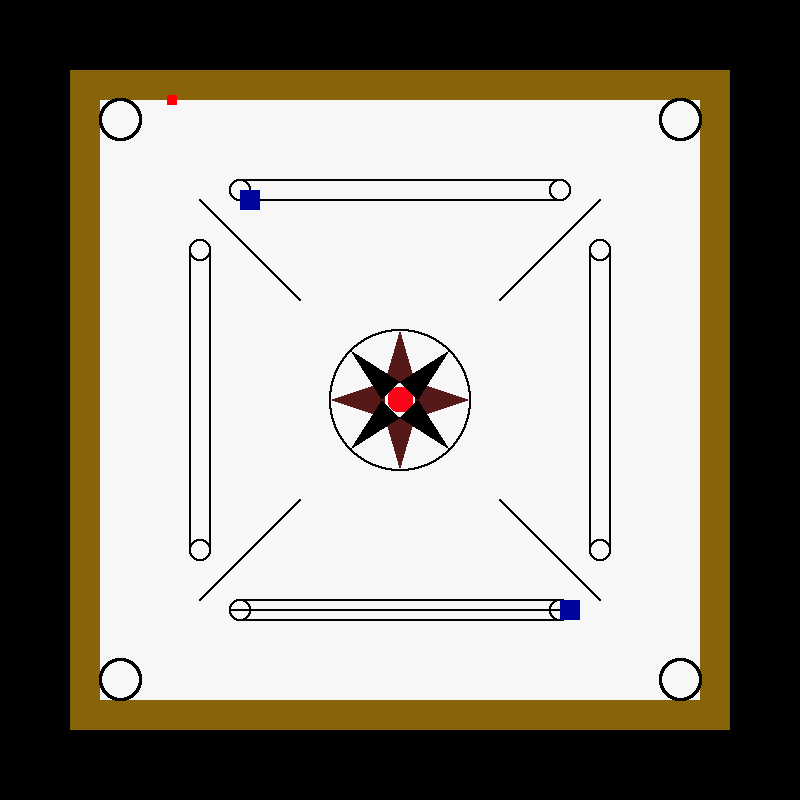

In [ ]:
from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))